In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data (update the path and file type accordingly)
data = pd.read_csv('history.csv')

# Display the first few rows of the dataframe
print(data.head())

# Basic statistics
print(data.describe())



   Weight (lb) Body Fat Muscle Mass  Water   BMI Bone Mass  \
0        208.8       0%          0%     0%  30.0        0%   
1        207.9       0%          0%     0%  29.8        0%   
2        200.9    24.3%       39.4%  56.3%  28.8        0%   
3        202.8    24.7%       39.2%    56%  29.1        0%   
4        202.8    24.7%       39.2%    56%  29.1        0%   

                 Date/Time  
0  Mar 16 2019 09:46:29 PM  
1  Mar 16 2019 11:32:45 PM  
2  Mar 17 2019 08:50:59 AM  
3  Mar 17 2019 11:56:02 PM  
4  Mar 17 2019 11:56:58 PM  
       Weight (lb)          BMI
count  2521.000000  2521.000000
mean    185.242205    26.578501
std       6.947115     0.996537
min     163.900000    23.500000
25%     181.100000    26.000000
50%     184.100000    26.400000
75%     187.900000    27.000000
max     208.800000    30.000000


C:\Users\david\AppData\Local\Temp\ipykernel_6896\1215938912.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  plt.plot(pd.to_datetime(data['Date/Time']), data['Weight (lb)'], marker='o')


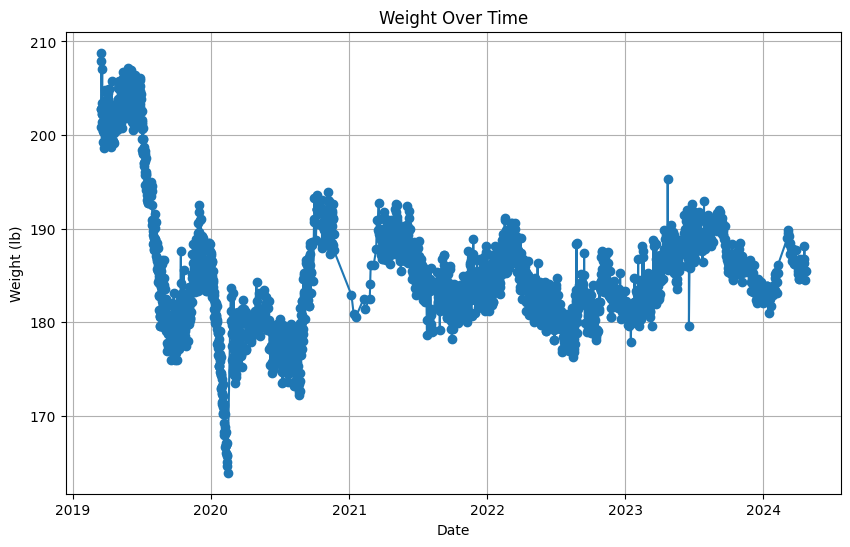

In [2]:

# Plotting example: Time series plot for weight
plt.figure(figsize=(10, 6))
plt.plot(pd.to_datetime(data['Date/Time']), data['Weight (lb)'], marker='o')
plt.title('Weight Over Time')
plt.xlabel('Date')
plt.ylabel('Weight (lb)')
plt.grid(True)
plt.show()


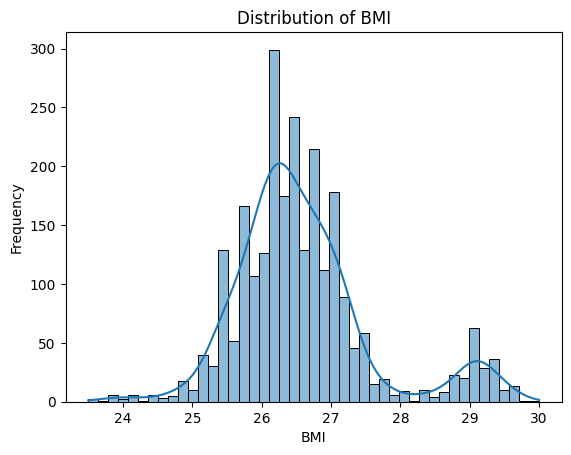

In [3]:

# Histogram of BMI
sns.histplot(data['BMI'], kde=True)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

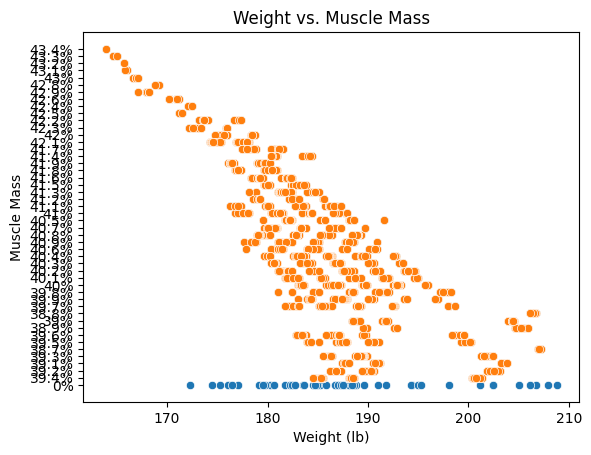

In [10]:

# Scatter plot of Weight vs. Muscle Mass
sns.scatterplot(x=data['Weight (lb)'], y=data['Muscle Mass'])
plt.title('Weight vs. Muscle Mass')
plt.xlabel('Weight (lb)')
plt.ylabel('Muscle Mass')
plt.gca().invert_yaxis()  # Inverting the y-axis
# plt.show()


# Remove rows where Muscle Mass is 0
filtered_data = data[data['Muscle Mass'] != '0%']

sns.scatterplot(x=filtered_data['Weight (lb)'], y=filtered_data['Muscle Mass'])
plt.title('Weight vs. Muscle Mass')
plt.xlabel('Weight (lb)')
plt.ylabel('Muscle Mass')
plt.gca().invert_yaxis()  # Inverting the y-axis
plt.show()

C:\Users\david\AppData\Local\Temp\ipykernel_5284\1929382353.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  plt.plot(pd.to_datetime(data['Date/Time']), data['Weight (lb)'], label='Weight (lb)', color='blue')


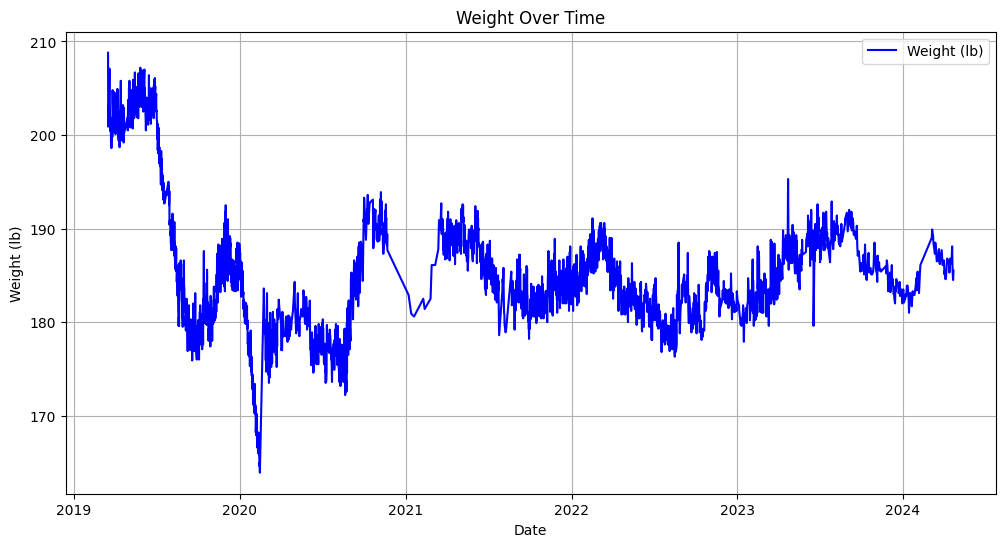

In [2]:
plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(data['Date/Time']), data['Weight (lb)'], label='Weight (lb)', color='blue')
plt.title('Weight Over Time')
plt.xlabel('Date')
plt.ylabel('Weight (lb)')
plt.legend()
plt.grid(True)
plt.show()


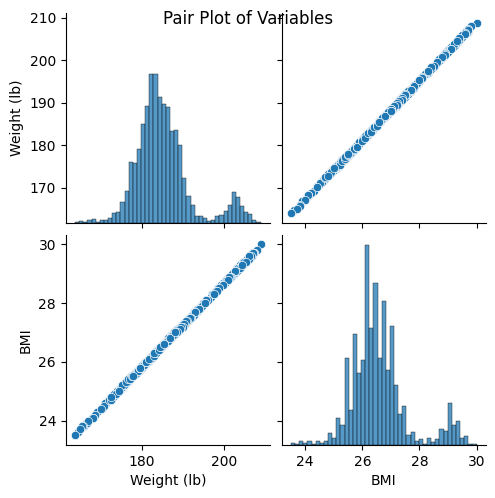

In [19]:
sns.pairplot(data[['Weight (lb)', 'Body Fat', 'Muscle Mass', 'Water', 'BMI', 'Bone Mass']])
plt.suptitle('Pair Plot of Variables', verticalalignment='top')
plt.show()

C:\Users\david\AppData\Local\Temp\ipykernel_6896\3993193778.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ax1.plot(pd.to_datetime(data['Date/Time']), data['Weight (lb)'], color='red')
C:\Users\david\AppData\Local\Temp\ipykernel_6896\3993193778.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ax2.plot(pd.to_datetime(data['Date/Time']), data['Muscle Mass'], color='blue')


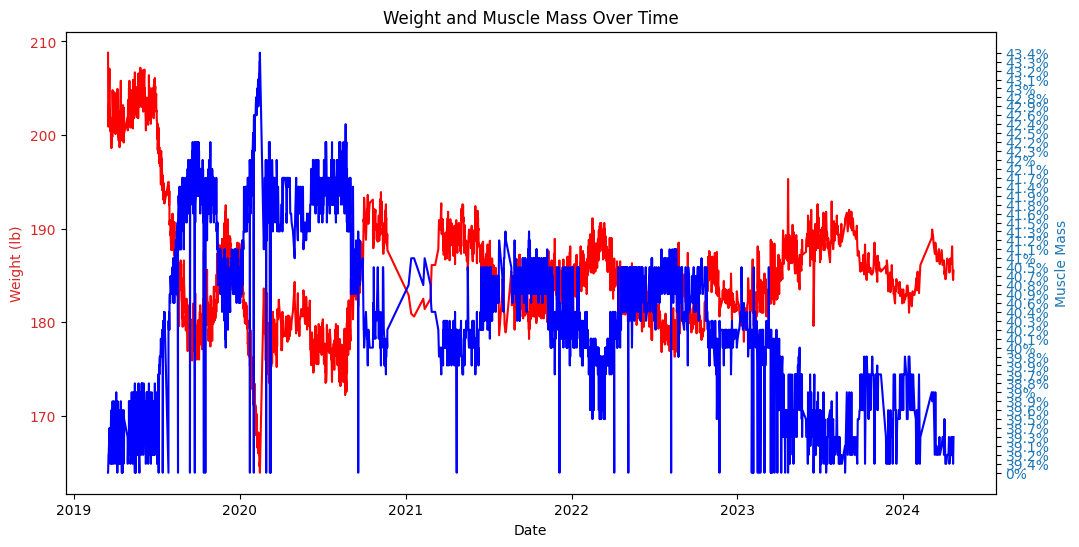

In [20]:
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.set_xlabel('Date')
ax1.set_ylabel('Weight (lb)', color='tab:red')
ax1.plot(pd.to_datetime(data['Date/Time']), data['Weight (lb)'], color='red')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.set_ylabel('Muscle Mass', color='tab:blue')
ax2.plot(pd.to_datetime(data['Date/Time']), data['Muscle Mass'], color='blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Weight and Muscle Mass Over Time')
plt.show()


C:\Users\david\AppData\Local\Temp\ipykernel_6896\829979706.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Year'] = pd.to_datetime(data['Date/Time']).dt.year


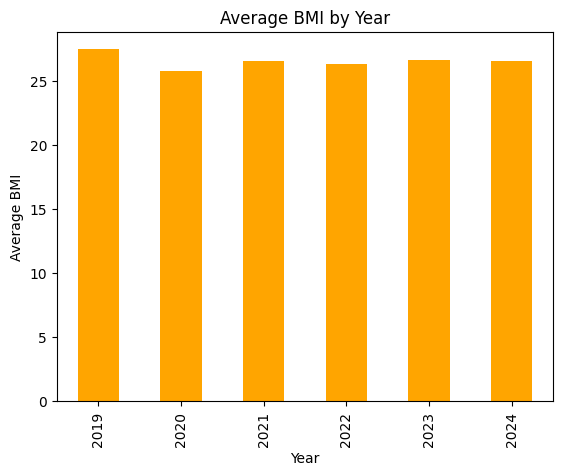

In [21]:
data['Year'] = pd.to_datetime(data['Date/Time']).dt.year
average_bmi_per_year = data.groupby('Year')['BMI'].mean()
average_bmi_per_year.plot(kind='bar', color='orange')
plt.title('Average BMI by Year')
plt.xlabel('Year')
plt.ylabel('Average BMI')
plt.show()
